In [1]:
from scipy import optimize
import numpy as np
from plotting import plot_surf
import matplotlib.pyplot as plt
np.random.seed(10)
%precision 4
%matplotlib inline

In [2]:
f = lambda x: x[0] + 0.3*x[1]
bnds = ((None, None), (None, None))

In [34]:
cs = [np.random.randn(2) for i in range(10)]
cs

[array([-1.9777, -1.7434]),
 array([ 0.2661,  2.385 ]),
 array([ 1.1237,  1.6726]),
 array([ 0.0991,  1.398 ]),
 array([-0.2712,  0.6132]),
 array([-0.2673, -0.5493]),
 array([ 0.1327, -0.4761]),
 array([ 1.3085,  0.195 ]),
 array([ 0.4002, -0.3376]),
 array([ 1.2565, -0.732 ])]

In [35]:
constrs = [{'type': 'ineq', 'fun': lambda x, c=cs[i]:  -np.dot(c, x) + 3 } for i in range(10)]
results = optimize.minimize(fun=f, x0=(100, 100), bounds=bnds, constraints=constrs, 
                            method='SLSQP',options={'maxiter': 100, 'disp':True})
x_star = results['x']
results

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.4372684171052716
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 6


     fun: -2.4372684171052716
     jac: array([ 1. ,  0.3])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-2.9121,  1.5828])

In [115]:
lmbds = [lambda x, c=cs[i]: np.dot(c, x) for i in range(10)]
conds = [lambda x, c=cs[i]: np.dot(c, x) - 3 <= 0 for i in range(10)]
x = x_star
for i in range(10):
    print('conditions:'lmbds[i](x), conds[i](x))
    

2.99999994434 True
3.00000002306 False
-0.624942893825 True
1.92395538808 True
1.76045266841 True
-0.0909690969887 True
-1.14007589653 True
-3.50173979035 True
-1.69983926399 True
-4.81749614599 True


-8.41724386006 11.5827561399 -12.9120952591 7.08790474091


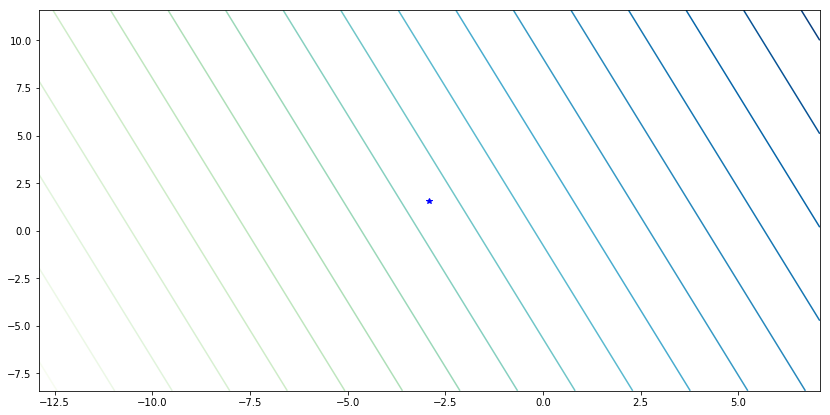

In [111]:
p = plot_surf(f, x_star, bound=30, n_lvls=20, n_steps=100, step=0.10);
x_min, x_max = p.gca().get_xlim()
y_min, y_max = p.gca().get_ylim()
print(y_min, y_max, x_min, x_max)

In [112]:
line_point = lambda i, x1: [x1, (3-cs[i][0]*x1) / cs[i][1]]
to_line = lambda p1, p2: [[p1[0], p2[0]], [p1[1], p2[1]]]

-8.41724386006 11.5827561399 -12.9120952591 7.08790474091


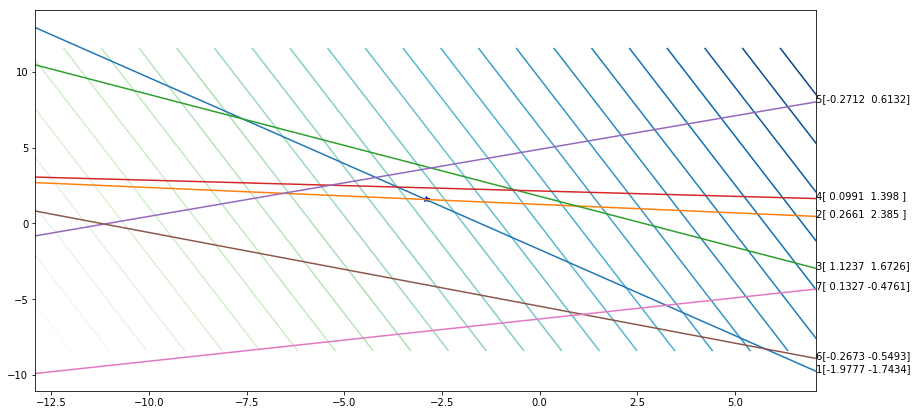

In [114]:
x_min, x_max = p.gca().get_xlim()
y_min, y_max = p.gca().get_ylim()
print(y_min, y_max, x_min, x_max)
plot_surf(f, x_star, bound=30, n_lvls=30)

for i in range(10):
    line = to_line(line_point(i, x_max), line_point(i, x_min))
#     print(line)
    if y_min < line[1][0]/2 < y_max and y_min < line[1][1]/2 < y_max:
        plt.plot(*line, '')
        plt.text(*line_point(i, x_max), str(i+1) + str(cs[i]))